1.0
|--- feature_3 <= 0.80
|   |--- class: setosa
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: virginica
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- class: virginica
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: virginica



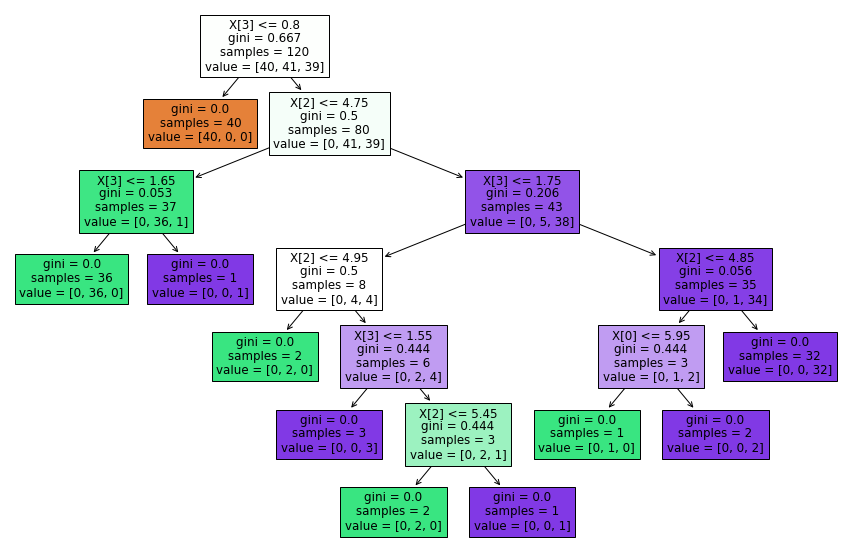

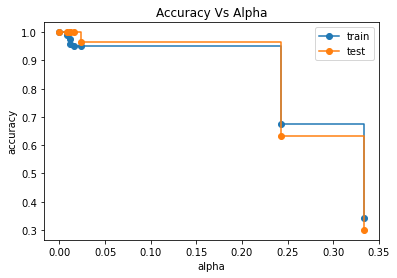

0.9666666666666667


[Text(334.8, 453.0, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(334.8, 90.59999999999997, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(669.6, 90.59999999999997, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

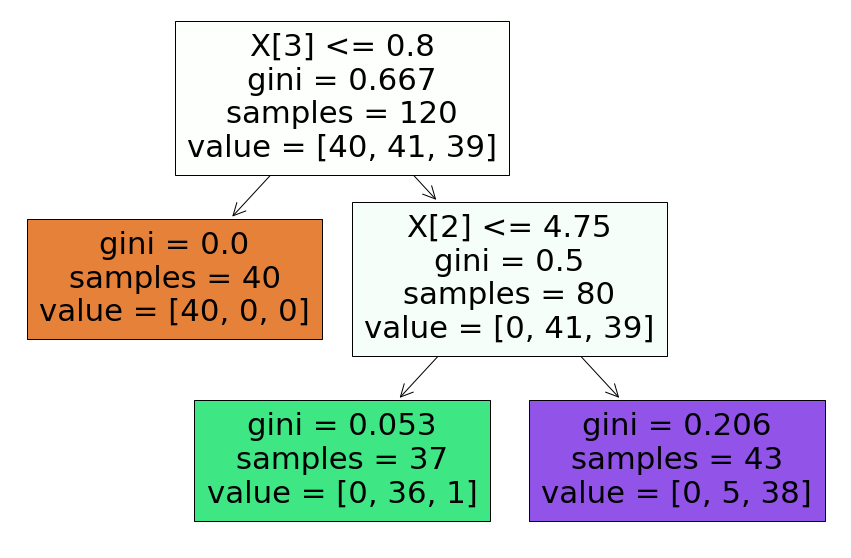

In [3]:
# Decision tree and cost complexity pruning understanding for iris dataset.....**** Try another dataset......
import seaborn as sns
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , mean_squared_error
from math import sqrt
iris = sns.load_dataset("iris")
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state=42) 
Model_iris = DecisionTreeClassifier() 
Model_iris.fit(X_train , y_train) 
predictions = Model_iris.predict(X_test)
print(accuracy_score(y_test , predictions))
plt.figure(figsize=(15,10))
tree.plot_tree(Model_iris,filled = True) # for growing tree
print(tree.export_text(Model_iris)) # To have elobarate idea of tree
path = Model_iris.cost_complexity_pruning_path(X_train,y_train) # cost complexity pruning - understanding
ccp_alphas , impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)
# To evalaute train and test scores for various ccp_alpha 
ccps = [] 
for ccp_alpha in ccp_alphas:
    Model_iris = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    Model_iris.fit(X_train,y_train)
    ccps.append(Model_iris)
train_scores = [Model_iris.score(X_train,y_train) for Model_iris in ccps]
test_scores = [Model_iris.score(X_test,y_test) for Model_iris in ccps]
# plot legend to evaluate optimal ccp_alpha values
fig , ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy Vs Alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle = "steps-post")
ax.legend()
plt.show()
# To visualize pruned tree right after optimal ccp_alpha
Model_iris_P = DecisionTreeClassifier(ccp_alpha = 0.05) # optimal ccp_alpha is 0.05
Model_iris_P.fit(X_train,y_train)
predictions = Model_iris_P.predict(X_test)
print(accuracy_score(y_test , predictions)) # Accury after pruning
plt.figure(figsize=(15,10))
tree.plot_tree(Model_iris_P,filled=True) # Tree after pruning
